# Date-A-Scientist Portfolio Project
This project was done through CodeAcademy's Data Scientist career path.


## Examine Data
Before anything else, I will examine the data so that we can get a good understanding of the data available to us.

In [1]:
#Import necessary modules
import pandas as pd
import numpy as np

#Load dataframe
df=pd.read_csv('profiles.csv')

#Get first few rows, column names, data types
print(df.dtypes)
df.head()

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Since this is a portfolio project, I would prefer it if I could use all of the skills I have learned so far. 

Here's a possible goal: we can try to predict who is single based on their profile information. By being able to predict whether a user is single, OkCupid can increase the frequency of profiles featured to the single user (assuming that all single people on OkCupid are looking for a partner/s.

1. **Age** may be a relevant category, as older people tend to already be in relationships.
2. **Drinks** may be relevant, as alcohol is used as a social lubricant, which may increase the chances of someone finding someone they like. The same goes for **drugs**.
3. **Height** may be an indicator as there tends to be a favorable bias toward people who are tall.
4. **Income** may be relevant as it gives the individual more freedom to do the things they want to do, which may increase the chances of them meeting someone they like.
5. **Education** may be relevant as being in education may limit the time someone has for dating. However, one could also argue that being in a social environment with people who are roughly the same age as you may increase the probability of one finding someone they like.
6. **Jobs** may be relevant to one's relationship status. Many people find their future spouses through work. On the other hand, some people may focus on work rather than relationships.
9. **Sex** may be relevant, but I don't have a concrete line of reasoning to justify my choice. It's just intuition I guess.


**Status** is the target.

Ok, it looks like the following are features worth considering:

'''age,drinks,drugs,height,income,education,job,sex,last online,status'''

Before we begin, I will modify the data so that it will be easier to graph and model. One thing I need to do is to remove all NaN values.

In [2]:
feature_list=['age','drinks','drugs','height','income','education','job','sex','last_online','status']
plotting_df=df[feature_list]
plotting_df.dropna(how="any",inplace=True)

<ipython-input-2-ea3c36053904>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotting_df.dropna(how="any",inplace=True)


Next, I will examine each column to find data that might cause issues. Lets start with age.

In [3]:
print(plotting_df.age.value_counts())

27    2272
26    2269
28    2135
25    2077
24    1975
29    1952
30    1893
31    1613
23    1568
32    1558
33    1336
22    1149
34    1120
35    1030
36     935
37     864
38     796
21     787
39     713
42     657
40     631
41     616
20     606
43     535
44     452
45     424
46     366
19     349
47     343
48     343
49     320
50     301
52     256
51     229
56     193
54     190
55     186
57     185
18     176
59     163
53     163
58     146
61     142
60     139
62     127
63     107
65      84
66      82
64      78
67      53
68      46
69      21
Name: age, dtype: int64


No issue here, lets move on to drinks.

In [4]:
print(plotting_df.drinks.value_counts())

socially       26279
rarely          4351
often           3143
not at all      2473
very often       319
desperately      186
Name: drinks, dtype: int64


No problems here. Lets move on to drugs.

In [5]:
print(plotting_df.drugs.value_counts())

never        30090
sometimes     6335
often          326
Name: drugs, dtype: int64


Great! Lets move onto height and income:

In [6]:
print(plotting_df.height.value_counts())
print(plotting_df.income.value_counts())

70.0    3674
68.0    3359
67.0    3351
72.0    3171
69.0    3155
66.0    3006
71.0    2890
65.0    2403
64.0    2379
73.0    1750
63.0    1720
74.0    1506
62.0    1410
75.0     832
61.0     647
76.0     475
60.0     469
77.0     167
59.0     134
78.0      74
58.0      37
79.0      36
80.0      17
82.0      10
95.0      10
81.0       9
83.0       8
57.0       8
56.0       6
53.0       4
55.0       4
94.0       3
36.0       3
54.0       3
84.0       2
91.0       2
43.0       2
49.0       1
90.0       1
26.0       1
9.0        1
4.0        1
88.0       1
51.0       1
86.0       1
1.0        1
3.0        1
48.0       1
37.0       1
87.0       1
85.0       1
47.0       1
Name: height, dtype: int64
-1          27898
 20000       2381
 100000      1217
 80000        851
 30000        809
 40000        779
 50000        743
 60000        563
 70000        549
 150000       475
 1000000      353
 250000       103
 500000        30
Name: income, dtype: int64


The income value of -1 may cause issues with normalization later on. I will change them to zeros.

In [7]:
plotting_df.loc[(plotting_df.income == -1),'income']=0
print(plotting_df.income.value_counts())

0          27898
20000       2381
100000      1217
80000        851
30000        809
40000        779
50000        743
60000        563
70000        549
150000       475
1000000      353
250000       103
500000        30
Name: income, dtype: int64


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Awesome! Lets check out education:

In [8]:
print(plotting_df.education.value_counts())

graduated from college/university    15852
graduated from masters program        6332
working on college/university         4147
graduated from two-year college       1227
graduated from high school            1126
working on masters program            1095
graduated from ph.d program            951
working on two-year college            828
graduated from law school              735
dropped out of college/university      727
working on ph.d program                648
college/university                     479
graduated from space camp              453
graduated from med school              350
dropped out of space camp              330
working on space camp                  272
working on law school                  164
two-year college                       159
working on med school                  153
dropped out of two-year college        146
dropped out of masters program          96
dropped out of ph.d program             91
dropped out of high school              85
masters pro

One problem here is that some entries are not specific. For example, three people stated for their education "med school". However, this does not tell me whether they are enrolled in med school. I will count how many entries in the education column are not specific.

In [9]:
spec_count=0
unspec_count=0
for edu in plotting_df.loc[:,'education']:
    if 'graduated' in edu or 'working on' in edu or 'dropped out' in edu:
        spec_count+=1
    else:
        unspec_count+=1
print(unspec_count)
print(unspec_count/(spec_count+unspec_count))

849
0.02310141220647057


498 profiles have non-specific entries for the 'education' part of the profile. Removing these entries will only remove 2% of the current dataset. I will remove this data.

In [10]:
plotting_df.drop(plotting_df[(plotting_df.loc[:,'education']=="college/university")|
                            (plotting_df['education']=="two-year college")|
                             (plotting_df['education']=="high school")|
                             (plotting_df['education']=="masters program")|
                             (plotting_df['education']=="space camp")|
                             (plotting_df['education']=="ph.d program")|
                             (plotting_df['education']=="law school")|
                             (plotting_df['education']=="med school")
                            ].index,inplace=True)
print(plotting_df['education'].value_counts())
spec_count=0
unspec_count=0
for edu in plotting_df['education']:
    if 'graduated' in edu or 'working on' in edu or 'dropped out' in edu:
        spec_count+=1
    else:
        unspec_count+=1
print(unspec_count)
print(unspec_count/(spec_count+unspec_count))

graduated from college/university    15852
graduated from masters program        6332
working on college/university         4147
graduated from two-year college       1227
graduated from high school            1126
working on masters program            1095
graduated from ph.d program            951
working on two-year college            828
graduated from law school              735
dropped out of college/university      727
working on ph.d program                648
graduated from space camp              453
graduated from med school              350
dropped out of space camp              330
working on space camp                  272
working on law school                  164
working on med school                  153
dropped out of two-year college        146
dropped out of masters program          96
dropped out of ph.d program             91
dropped out of high school              85
working on high school                  71
dropped out of law school               13
dropped out

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


My rationale for the education column is that being in school (i.e. enrolled). I will edit these values so that 0 is not enrolled and 1 is enrolled.

In [11]:
plotting_df.loc[:,'in_edu']=plotting_df.loc[:,'education'].apply(lambda x: 0 if "graduated" in x or "dropped out" in x else 1)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Cool! Now I will inspect jobs.

In [12]:
print(plotting_df.job.value_counts())

other                                5123
student                              3683
science / tech / engineering         3419
computer / hardware / software       3243
sales / marketing / biz dev          3042
artistic / musical / writer          2924
medicine / health                    2614
education / academia                 2503
executive / management               1670
banking / financial / real estate    1621
entertainment / media                1426
law / legal services                  912
hospitality / travel                  890
construction / craftsmanship          630
clerical / administrative             557
political / government                521
rather not say                        308
transportation                        248
unemployed                            221
retired                               183
military                              164
Name: job, dtype: int64


Lastly, I will examine sex and status.

In [13]:
print(plotting_df['sex'].value_counts())
print(plotting_df['status'].value_counts())

m    21306
f    14596
Name: sex, dtype: int64
single            33332
seeing someone     1266
available          1093
married             207
unknown               4
Name: status, dtype: int64


The unknown relationship status may not give us a lot of insight. I will remove them.

In [14]:
plotting_df.loc[:,'status'].drop(plotting_df[plotting_df.loc[:,'status']=='unknown'].index,inplace=True)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:4443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now, I will examine the last_online column.

In [15]:
print(plotting_df['last_online'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        2012-06-28-20-30
1        2012-06-29-21-41
4        2012-06-27-21-26
7        2012-06-29-12-30
9        2012-06-28-21-08
               ...       
59939    2012-07-01-06-08
59941    2012-06-12-21-47
59942    2012-06-29-11-01
59943    2012-06-27-23-37
59944    2012-06-23-13-01
Name: last_online, Length: 35902, dtype: object>


I will alter this data so that we get the days since we last saw the person on the website. I think that this will help with getting data that is more useful for ML models.

In [16]:
from datetime import date
plotting_df.loc[:,'last_online'] = pd.to_datetime(plotting_df.loc[:,'last_online'], format='%Y-%m-%d-%H-%M')
plotting_df.loc[:,"last_online"]=plotting_df.loc[:,"last_online"].astype('datetime64')
plotting_df.loc[:,"most recent"]=plotting_df.loc[:,"last_online"].sort_values(ascending=False).iloc[0]
print(plotting_df.loc[:,"last_online"].sort_values(ascending=False))
plotting_df.loc[:,"days since last seen"]=plotting_df.loc[:,"most recent"].astype('datetime64')-plotting_df.loc[:,"last_online"].astype('datetime64')
print(plotting_df.loc[:,"days since last seen"].dtype)
plotting_df.loc[:,"days since last seen"]=plotting_df.loc[:,"days since last seen"].apply(lambda x:x.days)
print(plotting_df.loc[:,"days since last seen"].sort_values(ascending=False))

59873   2012-07-01 08:57:00
59838   2012-07-01 08:56:00
59826   2012-07-01 08:56:00
59819   2012-07-01 08:56:00
59842   2012-07-01 08:56:00
                ...        
43845   2011-06-27 10:48:00
40423   2011-06-27 10:36:00
58982   2011-06-27 09:33:00
13384   2011-06-27 08:25:00
30466   2011-06-27 01:52:00
Name: last_online, Length: 35902, dtype: datetime64[ns]
timedelta64[ns]
30466    370
13384    370
1162     369
10864    369
37418    369
        ... 
19403      0
30650      0
45571      0
19409      0
47617      0
Name: days since last seen, Length: 35902, dtype: int64


I will plot some scatter plots to see if there is any correlation between these features. I will update the features list.

In [17]:
feature_list=['age','drinks','drugs','height','income','in_edu','job','sex','days since last seen','status']
feature_list1=['age','drinks','drugs','height','income','in_edu','job','days since last seen','sex']

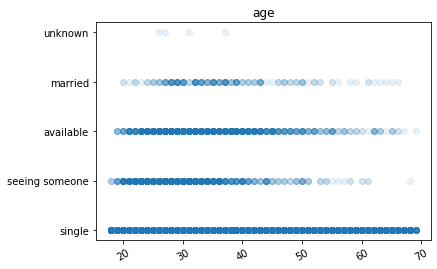

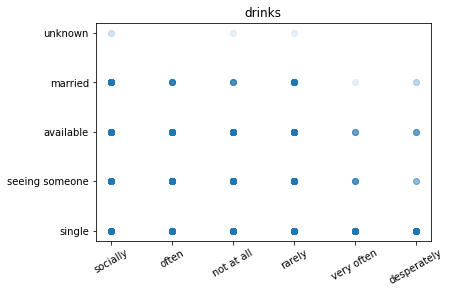

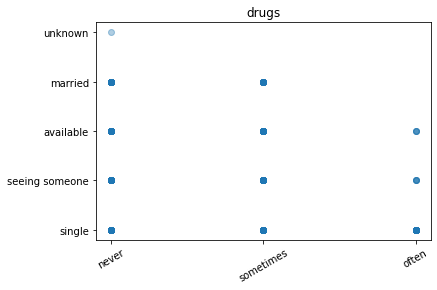

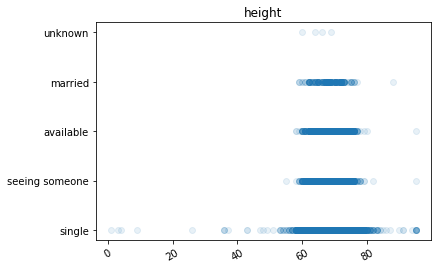

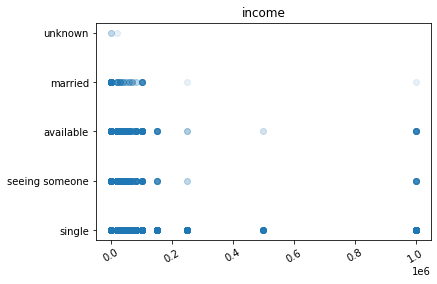

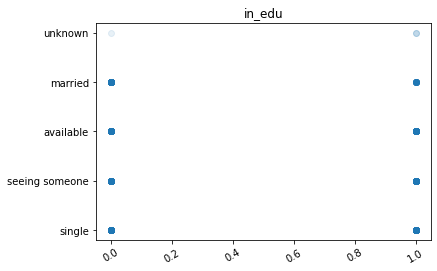

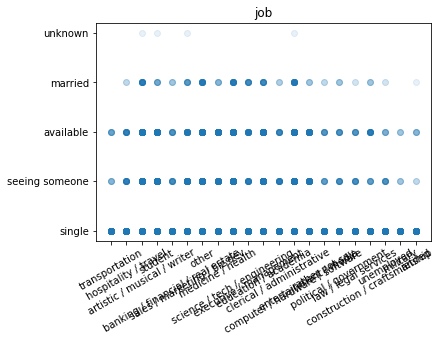

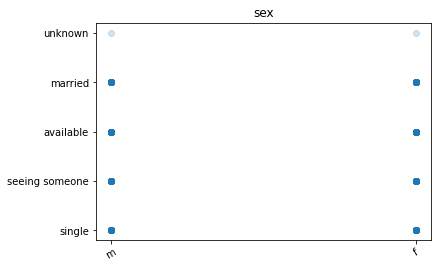

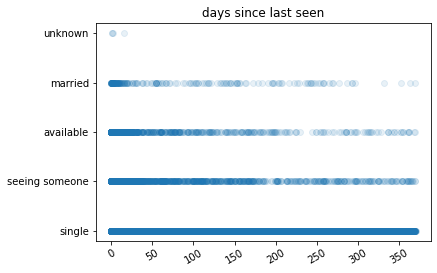

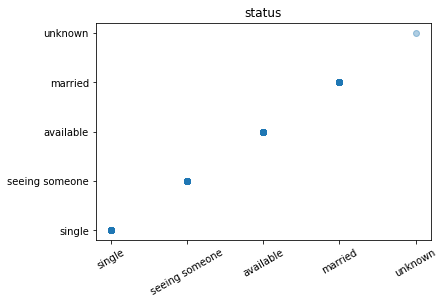

In [18]:
from matplotlib import pyplot as plt
for feature in feature_list:
    plt.scatter(plotting_df[feature],plotting_df.status,alpha=.1)
    plt.title(feature)
    plt.xticks(rotation=30)
    plt.show()

Some of these graphs show some correlation. For example, there are single people all across the age x-axis, but more 20-40 year olds are married.
There aren't as many people who desperately need to drink who are married (perhaps alcohol consumption can abate relationships).
It looks like not a lot of people who do drugs often are married.
Since these are categorical labels, I will make individual columns for each choice.
Based on the above, I believe that it would be best to use a KNN classifier. Before I begin, I will need to normalize the data.


In [19]:
plotting_df.loc[:,"is single"]=np.where(plotting_df.loc[:,"status"]=='single',1,0)
columns_to_change=["drinks","drugs","job","sex"]
for column in columns_to_change:
    value_list=pd.unique(plotting_df.loc[:,column])
    for value in value_list:
        new_col_name=column+' '+value+'?'
        plotting_df.loc[:,new_col_name]=np.where(plotting_df.loc[:,column]==value,1,0)
plotting_df.drop(columns=["drinks","drugs","job","sex","education","last_online","status","most recent"],inplace=True)
print(plotting_df.columns)
print(plotting_df.head())

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Index(['age', 'height', 'income', 'in_edu', 'days since last seen',
       'is single', 'drinks socially?', 'drinks often?', 'drinks not at all?',
       'drinks rarely?', 'drinks very often?', 'drinks desperately?',
       'drugs never?', 'drugs sometimes?', 'drugs often?',
       'job transportation?', 'job hospitality / travel?',
       'job artistic / musical / writer?', 'job student?',
       'job banking / financial / real estate?',
       'job sales / marketing / biz dev?', 'job other?',
       'job medicine / health?', 'job science / tech / engineering?',
       'job executive / management?', 'job education / academia?',
       'job clerical / administrative?', 'job computer / hardware / software?',
       'job entertainment / media?', 'job rather not say?',
       'job political / government?', 'job law / legal services?',
       'job construction / craftsmanship?', 'job unemployed?', 'job military?',
       'job retired?', 'sex m?', 'sex f?'],
      dtype='object')
   age  he

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
from sklearn.preprocessing import scale
df1=plotting_df
feature_list1=['age', 'height', 'income', 'in_edu', 'days since last seen',
        'drinks socially?', 'drinks often?', 'drinks not at all?',
       'drinks rarely?', 'drinks very often?', 'drinks desperately?',
       'drugs never?', 'drugs sometimes?', 'drugs often?',
       'job transportation?', 'job hospitality / travel?',
       'job artistic / musical / writer?', 'job student?',
       'job banking / financial / real estate?',
       'job sales / marketing / biz dev?', 'job other?',
       'job medicine / health?', 'job science / tech / engineering?',
       'job executive / management?', 'job education / academia?',
       'job clerical / administrative?', 'job computer / hardware / software?',
       'job entertainment / media?', 'job rather not say?',
       'job political / government?', 'job law / legal services?',
       'job construction / craftsmanship?', 'job unemployed?', 'job military?',
       'job retired?', 'sex m?', 'sex f?']
data=df1[feature_list1]
label=df1["is single"]
scaled_data=scale(data,axis=0)

1 || 0.8768973680545885
2 || 0.8316390474864225
3 || 0.9154713828157638
4 || 0.9026597966856984
5 || 0.9254978415262498
6 || 0.9222949449937334
7 || 0.9284222253168083
8 || 0.9268904052360395
9 || 0.92953627628464
10 || 0.9285614816877872
11 || 0.9302325581395349
12 || 0.9300933017685559
13 || 0.9302325581395349
14 || 0.9302325581395349
15 || 0.9305110708814929
16 || 0.9302325581395349
17 || 0.9305110708814929
18 || 0.9303718145105139
19 || 0.9306503272524718


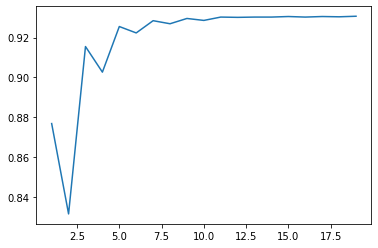

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
scores=[]
for k in list(range(1,20)):
    classifier=KNeighborsClassifier(n_neighbors=k)
    train_data,test_data,train_label,test_label=train_test_split(scaled_data,label,train_size=.8,test_size=.2,random_state=1)
    classifier.fit(train_data,train_label)
    print(str(k)+" || "+str(classifier.score(test_data,test_label)))
    scores.append(classifier.score(test_data,test_label))
plt.close("all")
plt.plot(list(range(1,20)),scores)
plt.show()

It looks like the efficacy of the model starts to taper at around k=11 to k=19. k=15 seems reasonable.
Holy moly! Our R-squared is .93!

## Conclusion:
What I learned:
1. We can predict whether someone is single with an accuracy of around .93.
2. Learned the recommended ways of calling columns and the data inside them.

This model can be augmented to predict other categorical features of OkCupid users.
This model may be able to be improved by utilizing the data from user essays. NLP would be a good tool for this.
